### Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Create a function to display the image in a larger size

In [2]:
def display(img, cmap = None):
    plt.figure(figsize=(10,8))
    plt.imshow(img, cmap=cmap)

### Read 'coins_image.jpg' with cv2

In [3]:
img = cv2.imread('coins_image.jpg')

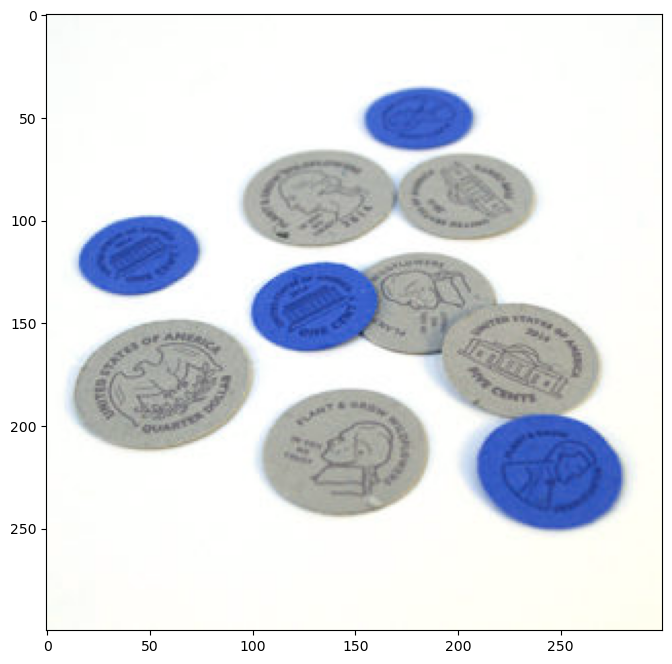

In [4]:
display(img)

### Apply Median Blur

In [5]:
img_blur = cv2.medianBlur(img,15)

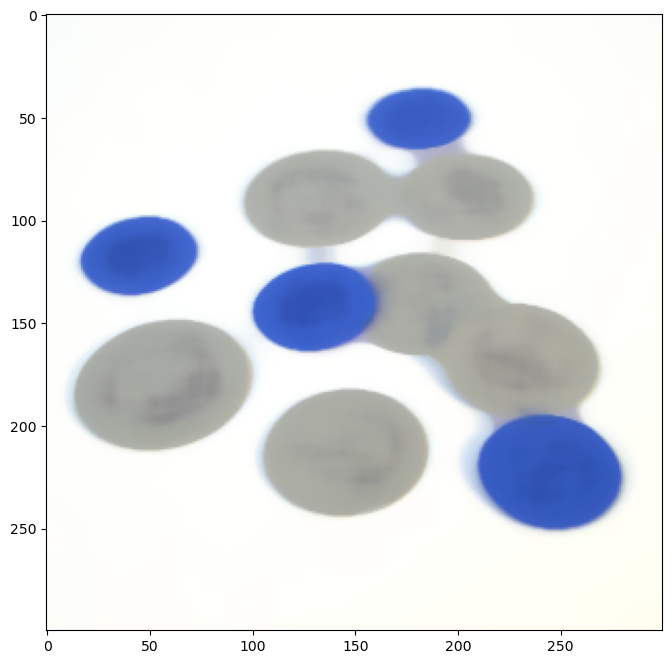

In [6]:
display(img_blur)

### Convert to Grayscale

In [7]:
img_gray = cv2.cvtColor(img_blur,cv2.COLOR_BGR2GRAY)

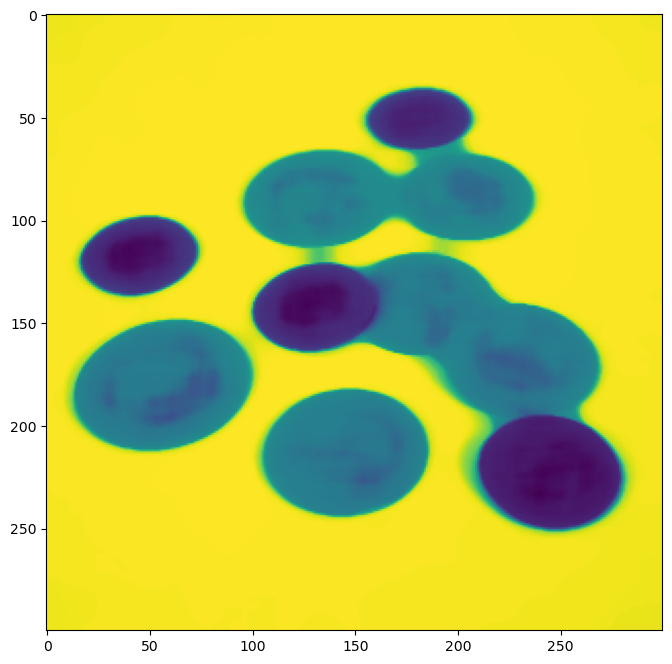

In [8]:
display(img_gray)

### Apply threshold (Inverse binary with OTSU)

In [9]:
ret,thresh = cv2.threshold(img_gray,150,275,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

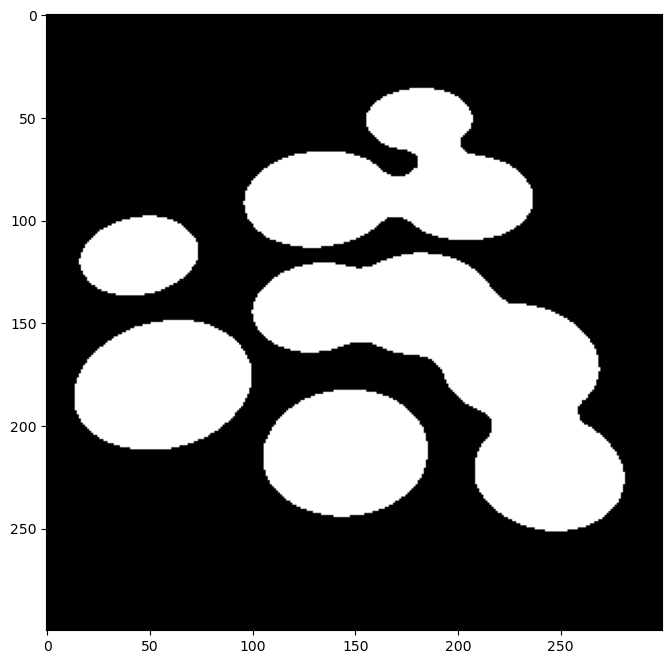

In [10]:
display(thresh, cmap = 'gray')

### Remove noise with the help of a morphological operator

In [11]:
kernel = np.ones((3,3))
n_img = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations=3)

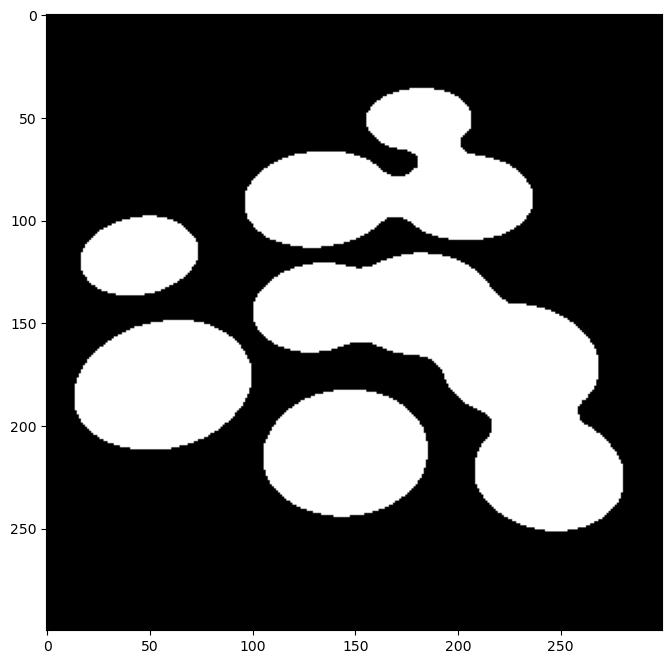

In [12]:
display(n_img, cmap= 'gray')

### Grab background that you are sure of

In [13]:
sure_bg = cv2.dilate(n_img,kernel,iterations=3)

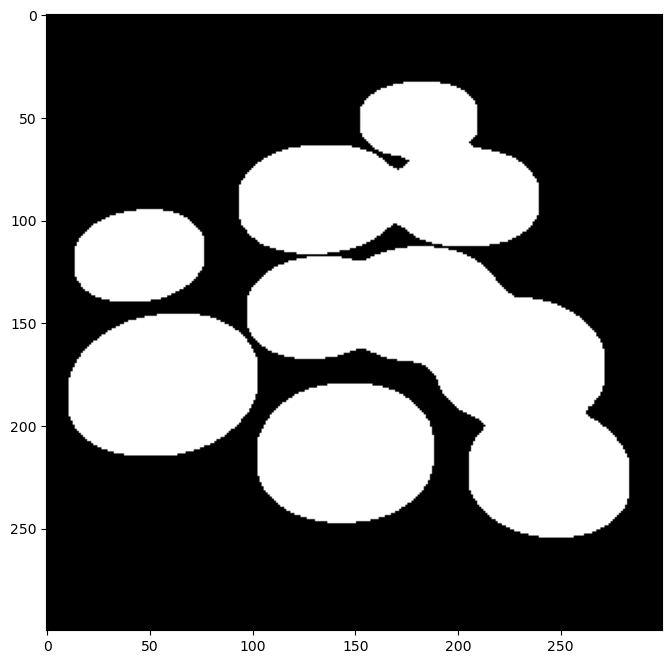

In [14]:
display(sure_bg, cmap = 'gray')

### Find sure Foreground

In [15]:
dist_transform = cv2.distanceTransform(sure_bg,cv2.DIST_L2,5)

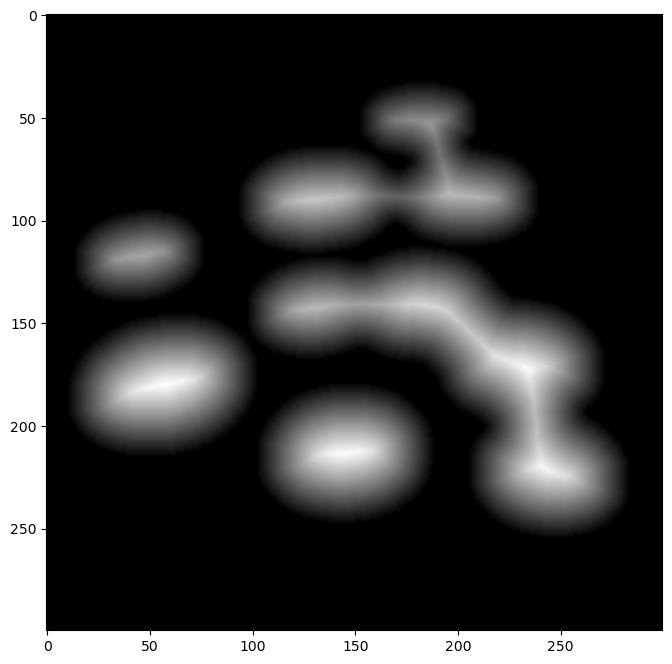

In [16]:
display(dist_transform,cmap='gray')

In [17]:
ret, sure_fg = cv2.threshold(dist_transform,0.5*dist_transform.max(),250,0)

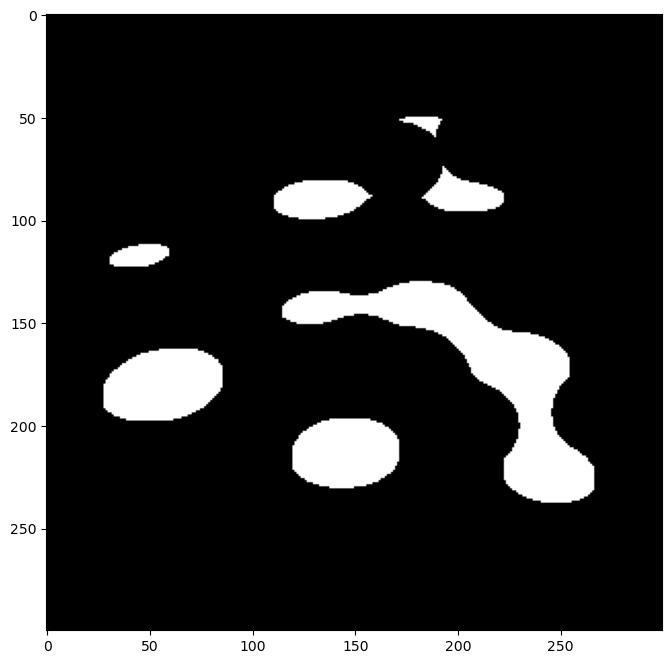

In [18]:
display(sure_fg, cmap = 'gray')

### Find unknown region

In [19]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

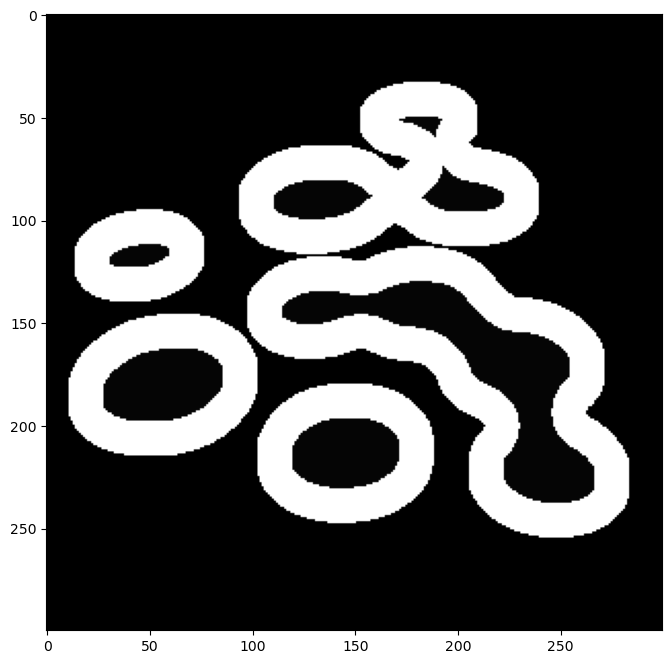

In [20]:
display(unknown, cmap = 'gray')

### Label Markers of sure Foreground

In [21]:
ret, marker = cv2.connectedComponents(sure_fg)
marker = marker+1
marker[unknown==255]=0

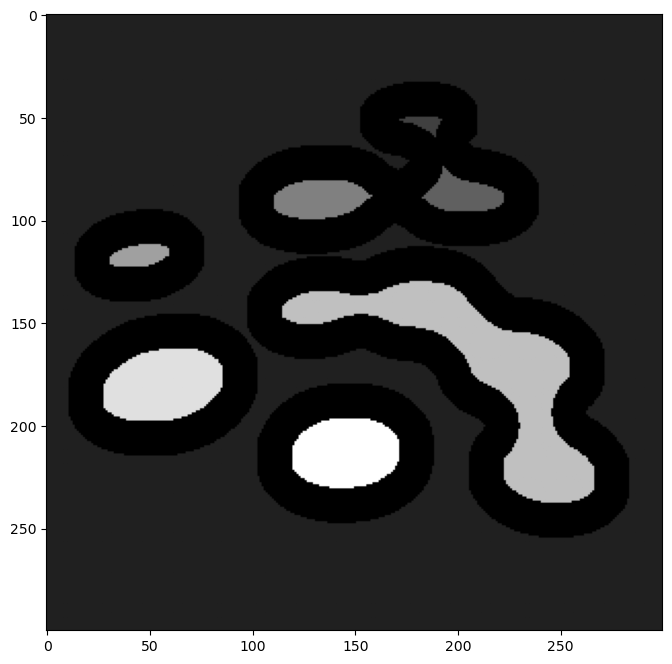

In [22]:
display(marker, cmap = 'gray')

### Apply watersheld alogirithm to find markers

In [23]:
marker = cv2.watershed(img,marker)

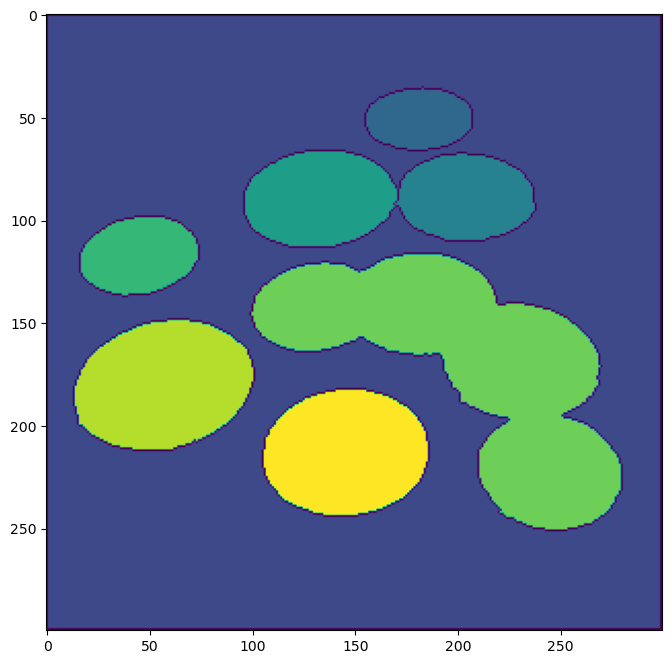

In [24]:
display(marker)

### Read the image again

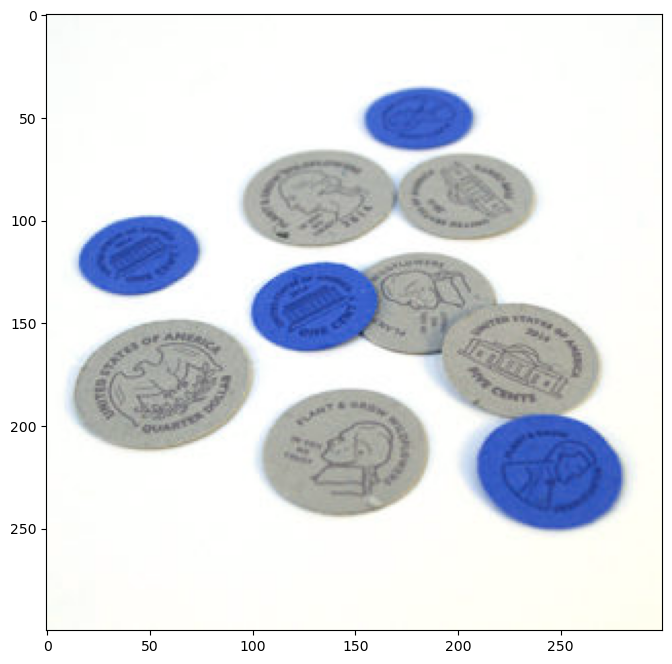

In [25]:
display(img)

### Find contours on Markers

In [26]:
contours, hierarchy = cv2.findContours(marker.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(img, contours, i, (255, 0, 0), 10)

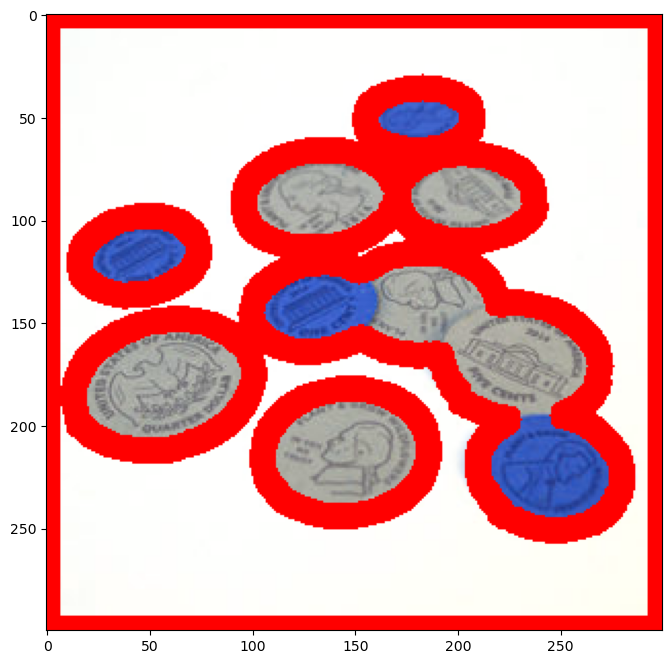

In [27]:
display(img)

***

# <span style = "color:green;font-size:40px"> Great Job!</span>